'''
@Author: Samadhan Thube

@Date: 13-11-24

@Last modified by: Samadhan Thube

@Last modified Date: 13-11-24 

@Title: Simple Linear Regression

'''

Step 1: Import Necessary Libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns


Step 2: Load and Prepare the Dataset

In [2]:
# Load the dataset
train_data = pd.read_csv('D:\\ML\\train.csv')
test_data = pd.read_csv('D:\\ML\\test.csv')


In [6]:
print("train data ",train_data.describe())

train data                   x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618


In [7]:
print("test data ",test_data.describe())

test data                  x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837


Step 3:Handling null values

In [8]:
missing_values = train_data.isna().sum()
print(missing_values)

x    0
y    1
dtype: int64


In [9]:
train_data.dropna(inplace= True)

In [10]:
train_data.isna().sum()

x    0
y    0
dtype: int64

In [11]:
train_data.shape

(699, 2)

Step 4:Visualizing Dataset

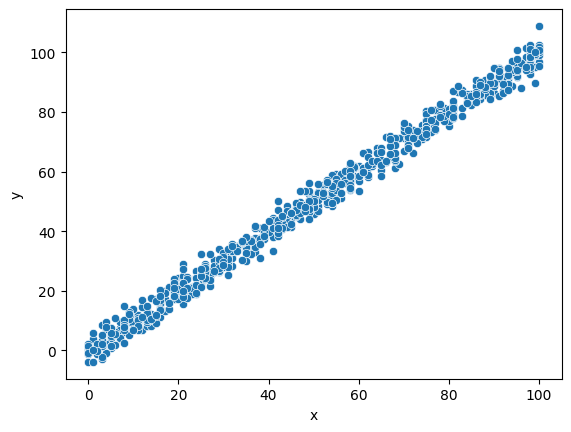

In [15]:
sns.scatterplot(x=train_data['x'], y=train_data['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Step 5: Split the Data into Training and Test Sets

In [18]:
X_train, X_test = train_data[['x']], test_data[['x']]
y_train, y_test = train_data[['y']], test_data[['y']]


Step 6: Scaling Dataset

In [20]:
scalar = StandardScaler()

x_train_scaled = scalar.fit_transform(X_train)
print("scaled x_train : ",x_train_scaled[0:5])

x_test_scaled = scalar.fit_transform(X_test)
print("scaled X_test : ",x_test_scaled[0:5])


scaled x_train :  [[-8.99096176e-01]
 [-4.94443564e-04]
 [-1.21015062e+00]
 [-4.15233705e-01]
 [ 1.27828495e+00]]
scaled X_test :  [[ 0.91589319]
 [-1.05200623]
 [-1.01686517]
 [-1.08714729]
 [-0.52489032]]


Step 7: Train the Linear Regression Model

In [23]:
model = LinearRegression()

model.fit(x_train_scaled,y_train)

y_pred = model.predict(x_test_scaled)
y_pred.shape

(300, 1)

Step 8: Evaluate the Model

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 10.772744770430302
R-squared: 0.9872108368470156


Step 9: Visualize the Results

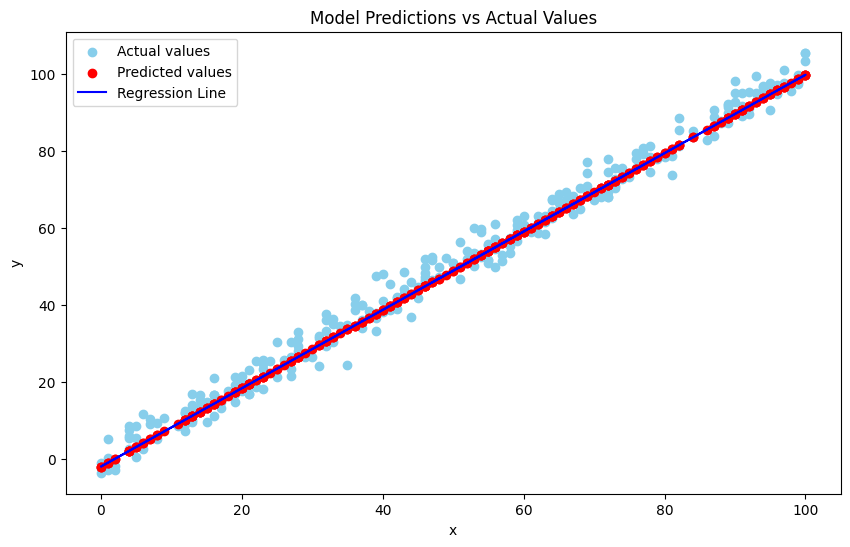

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='skyblue', label='Actual values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.plot(X_test, y_pred, color='blue', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.show()